In [27]:
import numpy as np  
import matplotlib.pyplot as plt
import gymnasium as gym
import time
import os
from collections import defaultdict

In [28]:
env = gym.make('CliffWalking-v0')
numactions = env.action_space.n
numstates = env.observation_space.n
print("Number of actions: ", numactions)
print("Number of states: ", numstates)

Number of actions:  4
Number of states:  48


In [29]:
state, _ = env.reset()
print("Initial state: ", state)
print("info", _)

Initial state:  36
info {'prob': 1}


In [30]:
print(env.step(0))
'''0: MOVE UP, 1: MOVE RIGHT, 2: MOVE DOWN, 3: MOVE LEFT'''

(24, -1, False, False, {'prob': 1.0})


'0: MOVE UP, 1: MOVE RIGHT, 2: MOVE DOWN, 3: MOVE LEFT'

In [31]:
def epsilon_greedy_policy(epsilon,Q,env):
  def policy(state):
    if state not in Q:
      #take any action with equal probability
      return np.random.choice(env.action_space.n)
    else:
      #take the best action with probability 1-epsilon
      if np.random.random() > epsilon:
        return np.argmax(Q[state])
      else:
        return np.random.choice(env.action_space.n)
  return policy

In [32]:
def generate_episode(env,policy):
  episode = []
  state, _ = env.reset()
  done = False
  while not done:
    action = policy(state)
    tup = env.step(action)
    next_state, reward, done = tup[0], tup[1], tup[2]
    episode.append((state,action,reward))
    state = next_state
  return episode

In [33]:
def sarsa(env,numeps,epsilon,alpha,gamma):
  Q = defaultdict(lambda: np.zeros(env.action_space.n))
  for i in range(numeps):
    if i%10000 == 0:
      print("Episode ", i)
    state, _ = env.reset()
    done = False
    while not done:
      policy = epsilon_greedy_policy(epsilon,Q,env)
      action = policy(state)
      tup = env.step(action)
      next_state, reward, done = tup[0], tup[1], tup[2] 
      Q[state][action] = Q[state][action] + alpha*(reward + gamma*Q[next_state][policy(next_state)] - Q[state][action])
      state = next_state
      
      
  return Q, policy

In [34]:
Q, policy = sarsa(env,500000,0.1,0.1,1.0)

Episode  0
Episode  10000
Episode  20000
Episode  30000
Episode  40000
Episode  50000
Episode  60000
Episode  70000
Episode  80000
Episode  90000
Episode  100000
Episode  110000
Episode  120000
Episode  130000
Episode  140000
Episode  150000
Episode  160000
Episode  170000
Episode  180000
Episode  190000
Episode  200000
Episode  210000
Episode  220000
Episode  230000
Episode  240000
Episode  250000
Episode  260000
Episode  270000
Episode  280000
Episode  290000
Episode  300000
Episode  310000
Episode  320000
Episode  330000
Episode  340000
Episode  350000
Episode  360000
Episode  370000
Episode  380000
Episode  390000
Episode  400000
Episode  410000
Episode  420000
Episode  430000
Episode  440000
Episode  450000
Episode  460000
Episode  470000
Episode  480000
Episode  490000


In [35]:
#extracting the value function from the Q function
V = defaultdict(float)
for state, actions in Q.items():
  action_value = np.max(actions)
  V[state] = action_value
  
  

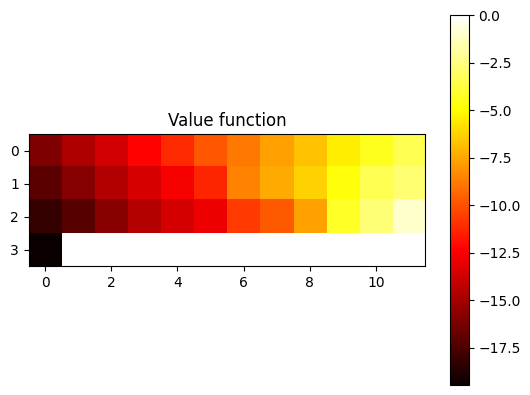

In [36]:
#plotting the value function
V = np.array([V[key] for key in np.arange(0,48)])
V = np.reshape(V,(4,12))
plt.imshow(V, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Value function")
plt.show()



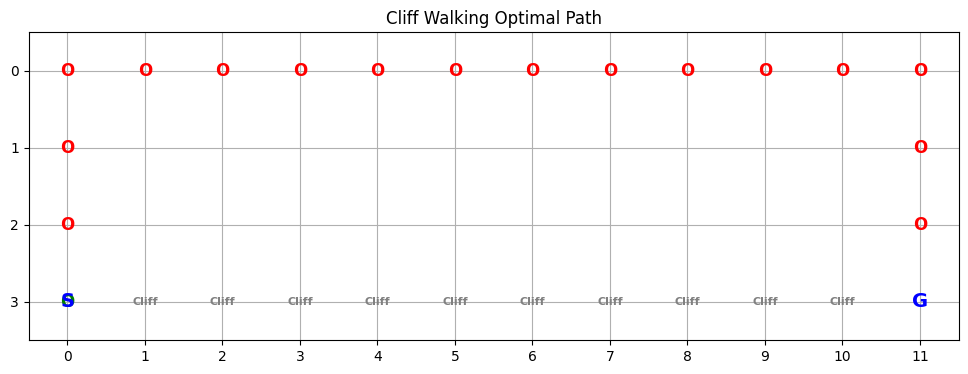

In [ ]:
def plot_cliffwalking_paths(Q, env):
    grid_rows, grid_cols = 4, 12  # Grid dimensions for CliffWalking-v0
    start_state = 36  # Start state index
    goal_state = 47   # Goal state index

    # Initialize the grid
    grid = np.zeros((grid_rows, grid_cols), dtype=int)

    # Define the cliff area
    cliff_indices = np.arange(37, 47)
    for idx in cliff_indices:
        row, col = divmod(idx, grid_cols)
        grid[row, col] = -100  # Cliff cells

    # Compute the optimal path
    state, _ = env.reset()
    optimal_path = []
    done = False
    while not done:
        row, col = divmod(state, grid_cols)
        optimal_path.append((row, col))
        action = np.argmax(Q[state]) 
        tup = env.step(action)
        state, _, done, _ = tup if len(tup) == 4 else (tup[0], tup[1], tup[2], None)

    # Mark the start and goal positions
    start_row, start_col = divmod(start_state, grid_cols)
    goal_row, goal_col = divmod(goal_state, grid_cols)

    # Plot the grid
    plt.figure(figsize=(12, 4))
    for r in range(grid_rows):
        for c in range(grid_cols):
            if (r, c) in optimal_path:
                color = "red" if (r, c) != (start_row, start_col) and (r, c) != (goal_row, goal_col) else "green"
                plt.text(c, r, 'O', ha='center', va='center', color=color, fontsize=12, fontweight='bold')
            elif grid[r, c] == -100:
                plt.text(c, r, 'Cliff', ha='center', va='center', color='gray', fontsize=8, fontweight='bold')

    # Highlight start and goal
    plt.text(start_col, start_row, 'S', ha='center', va='center', color='blue', fontsize=14, fontweight='bold')
    plt.text(goal_col, goal_row, 'G', ha='center', va='center', color='blue', fontsize=14, fontweight='bold')

    # Draw the grid
    plt.xlim(-0.5, grid_cols - 0.5)
    plt.ylim(grid_rows - 0.5, -0.5)
    plt.xticks(range(grid_cols))
    plt.yticks(range(grid_rows))
    plt.grid(True)
    plt.title("Cliff Walking Optimal Path")
    plt.show()

# Plot the optimal path
plot_cliffwalking_paths(Q, env)
